# RFM Segmentation using K-Means Clustering on Online Retail Dataset
## Objective:
To segment customers based on their purchasing behavior using RFM (Recency, Frequency, Monetary) analysis and apply K-Means Clustering to identify customer segments.

## RFM Feature Calculation
- **Recency:** Days since the customer’s last purchase
- **Frequency:** Number of purchases made
- **Monetary:** Total amount spent

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load online retail dataset
df = pd.read_csv('/content/drive/MyDrive/Data Analysis and Machine Learning with python Project/RFM_Customer_segmentation_k-Means_Clustering /OnlineRetail.csv',encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Exploratory Data Analysis

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [6]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


#### Recency

In [7]:
currentDate = pd.to_datetime('2012-01-01')

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [11]:
#find out every cutomer's last purchase date
customer_max_date = df.groupby('CustomerID').max()[['InvoiceDate']]
customer_max_date

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [12]:
(currentDate-customer_max_date['InvoiceDate']).dt.days

,InvoiceDate
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,29


In [13]:
customer_max_date['InvoiceAge'] = (currentDate-customer_max_date['InvoiceDate']).dt.days
customer_max_date

,InvoiceDate,InvoiceAge
CustomerID,,
12346.0,2011-01-18 10:17:00,347
12347.0,2011-12-07 15:52:00,24
12348.0,2011-09-25 13:13:00,97
12349.0,2011-11-21 09:51:00,40
12350.0,2011-02-02 16:01:00,332
...,...,...
18280.0,2011-03-07 09:52:00,299
18281.0,2011-06-12 10:53:00,202
18282.0,2011-12-02 11:43:00,29


In [14]:
recency = customer_max_date.drop('InvoiceDate',axis=1)
recency

,InvoiceAge
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,29


In [15]:
type(recency)

pandas.core.frame.DataFrame

### Frequency

In [16]:
freq = df.drop_duplicates(subset = 'InvoiceNo')
freq

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom


In [17]:
frequency = freq.groupby('CustomerID').count()[['InvoiceNo']]
frequency

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


### Monetary

In [18]:
df['total'] = df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [19]:
monetary = df.groupby('CustomerID')[['total']].sum()
monetary

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [20]:
RFM = pd.concat([recency,frequency,monetary],axis=1)
RFM

,InvoiceAge,InvoiceNo,total
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


In [21]:
RFM.columns = ['Recency','Frequency','Monetary']
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


## Machine Learning Part

### Scaling
we should scaling this data ,because we use K-Means algorithm

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFM)
scaled_data

array([[ 2.31656788, -0.32936215, -0.23100099],
       [-0.88904975,  0.20610242,  0.29343167],
       [-0.16456032, -0.11517632, -0.01231622],
       ...,
       [-0.83942719, -0.22226923, -0.20951263],
       [-0.87912524,  1.16993863,  0.02390005],
       [-0.49206924, -0.22226923, -0.00744423]])

In [23]:
scaled_data.shape

(4372, 3)

### K-Means Algorithm

In [24]:
#import KMeans Cluster
from sklearn.cluster import KMeans

In [25]:
#To find out the value of K, we use mannual code
k_range = range(2,11)
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(scaled_data)
  sse.append(km.inertia_)

In [26]:
sse

[9204.014314100881,
 6074.281828139145,
 4081.8960970338735,
 3038.3747049252697,
 2393.2306745535534,
 1911.0231759538497,
 1587.458071239345,
 1446.919426603338,
 1319.7685485507097]

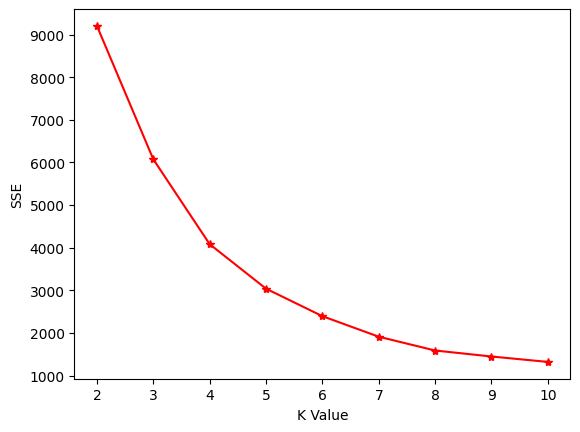

In [27]:
plt.plot(k_range,sse,'r-*')
plt.xlabel('K Value')
plt.ylabel('SSE')
plt.show()

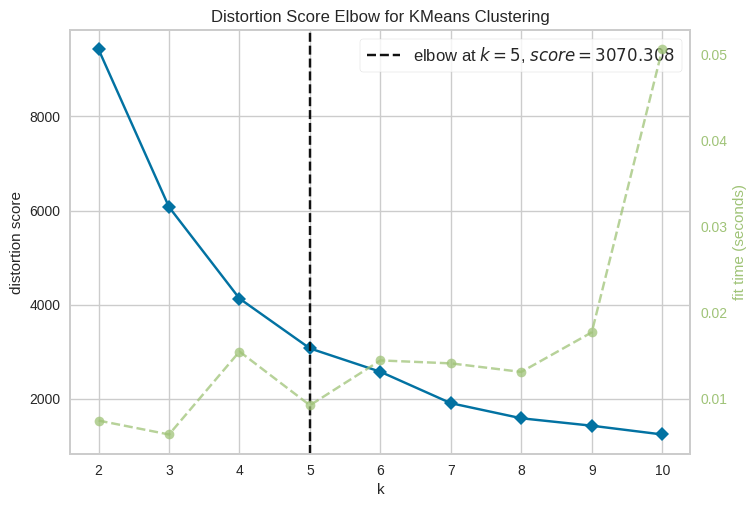

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
#now use library to find out the value of K
from yellowbrick.cluster import KElbowVisualizer
elbow = KElbowVisualizer(KMeans(),k=10)
elbow.fit(scaled_data)
elbow.show()

In [29]:
#create an object and data fiting
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)

KMeans(n_clusters=3)

In [30]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [31]:
kmeans.labels_.shape

(4372,)

In [32]:
RFM['Cluster'] = kmeans.labels_
RFM

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,347,2,0.00,1
12347.0,24,7,4310.00,0
12348.0,97,4,1797.24,0
12349.0,40,1,1757.55,0
12350.0,332,1,334.40,1
...,...,...,...,...
18280.0,299,1,180.60,1
18281.0,202,1,80.82,1
18282.0,29,3,176.60,0


In [33]:
RFM.Cluster.unique()

array([1, 0, 2], dtype=int32)

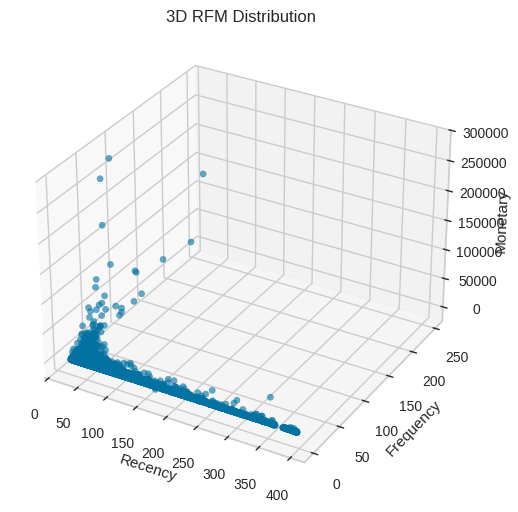

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(RFM['Recency'], RFM['Frequency'], RFM['Monetary'], alpha=0.6)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D RFM Distribution')
plt.show()

In [35]:
RFM[RFM.Cluster==0]


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347.0,24,7,4310.00,0
12348.0,97,4,1797.24,0
12349.0,40,1,1757.55,0
12352.0,58,11,1545.41,0
12356.0,44,3,2811.43,0
...,...,...,...,...
18277.0,80,2,97.63,0
18278.0,95,1,173.90,0
18282.0,29,3,176.60,0


In [36]:
RFM[RFM.Cluster==1]

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,347,2,0.00,1
12350.0,332,1,334.40,1
12353.0,226,1,89.00,1
12354.0,254,1,1079.40,1
12355.0,236,1,459.40,1
...,...,...,...,...
18260.0,194,8,2595.00,1
18262.0,162,1,149.48,1
18269.0,380,2,138.90,1


In [37]:
RFM[RFM.Cluster==2]

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12415.0,46,26,123725.45,2
12748.0,22,224,29072.10,2
12971.0,25,89,10930.26,2
13089.0,24,118,57385.88,2
13408.0,23,81,27487.41,2
13694.0,25,60,62653.10,2
13798.0,23,63,36351.42,2
14096.0,26,34,57120.91,2
14156.0,31,66,113384.14,2


In [38]:
rfm_data=RFM.groupby('Cluster').mean()[['Recency', 'Frequency', 'Monetary']]
rfm_data

,Recency,Frequency,Monetary
Cluster,,,
0,61.562693,5.549722,1795.818707
1,267.622744,1.852888,460.359902
2,27.346154,83.346154,75966.387308


In [39]:
def category(r):
  if r['Cluster']==2:
    return 'Diamond'
  elif r['Cluster']==0:
    return 'Gold'
  else:
    return 'Silver'

In [40]:
RFM['Customer_Category'] = RFM.apply(category,axis=1)
RFM

,Recency,Frequency,Monetary,Cluster,Customer_Category
CustomerID,,,,,
12346.0,347,2,0.00,1,Silver
12347.0,24,7,4310.00,0,Gold
12348.0,97,4,1797.24,0,Gold
12349.0,40,1,1757.55,0,Gold
12350.0,332,1,334.40,1,Silver
...,...,...,...,...,...
18280.0,299,1,180.60,1,Silver
18281.0,202,1,80.82,1,Silver
18282.0,29,3,176.60,0,Gold


In [48]:
results = pd.DataFrame(RFM['Customer_Category'].value_counts())

In [42]:
results

,count
Customer_Category,
Gold,3238
Silver,1108
Diamond,26


Text(0, 0.5, 'Number of Customers')

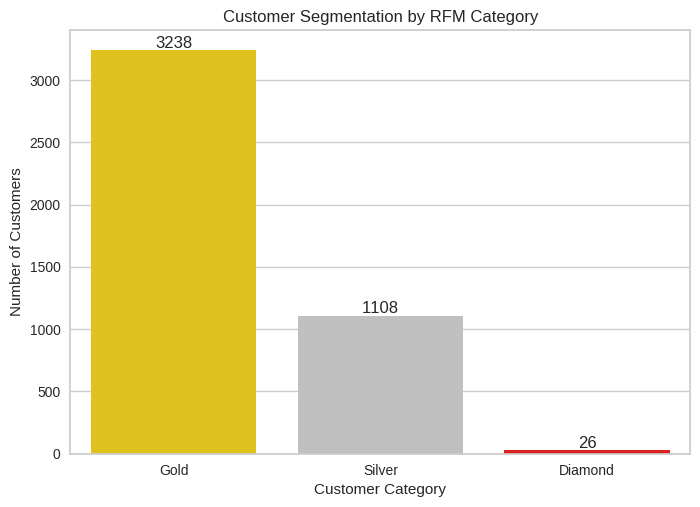

In [60]:
custom_palette = {
    'Diamond': 'red',
    'Gold': 'gold',
    'Silver': 'silver',

}
datalabel=sns.barplot(x='Customer_Category',y='count',data=results,estimator=np.sum,palette=custom_palette)
for i in datalabel.containers:
  datalabel.bar_label(i,)
plt.title('Customer Segmentation by RFM Category')
plt.xlabel('Customer Category')
plt.ylabel('Number of Customers')


In [68]:
#Normaly check which category customer min and max monetary, it is a optional and practice purpose only
c1 = RFM[RFM['Cluster']==1]
c0 = RFM[RFM['Cluster']==0]
c2 = RFM[RFM['Cluster']==2]

In [70]:
c1_min = c1[c1['Monetary'] == c1['Monetary'].min()]
c1_max = c1[c1['Monetary'] == c1['Monetary'].max()]
print('Cluster 1 minimum monetary:', pd.DataFrame(c1_min))
print('Cluster 1 minimum monetary:', c1_max)

Cluster 1 minimum monetary:             Recency  Frequency  Monetary  Cluster Customer_Category
CustomerID                                                         
17448.0         166          1  -4287.63        1            Silver
Cluster 1 minimum monetary:             Recency  Frequency  Monetary  Cluster Customer_Category
CustomerID                                                         
15749.0         257          4   21535.9        1            Silver


In [66]:
c1[c1['Monetary'] == c1['Monetary'].min()]

,Recency,Frequency,Monetary,Cluster,Customer_Category
CustomerID,,,,,
17448.0,166,1,-4287.63,1,Silver
